# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


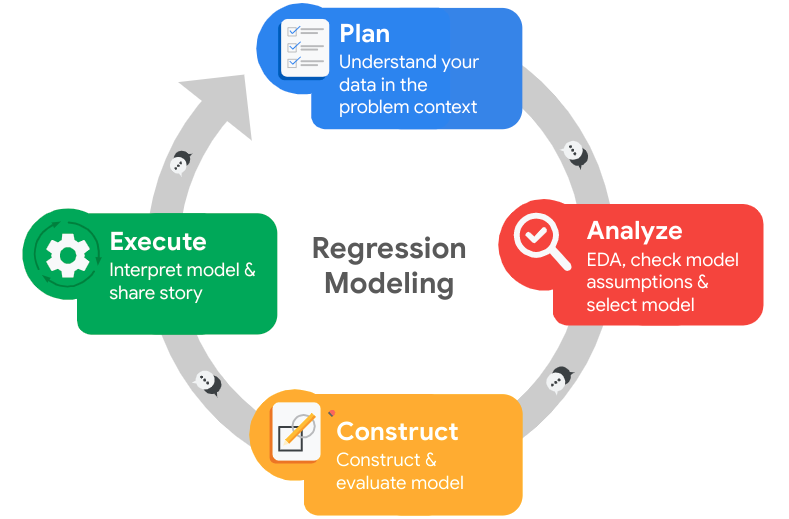

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

pd.set_option("display.max_column",None)

### Load dataset


In [2]:
 # Load dataset into a dataframe
df0 = pd.read_csv("google_advanced_data_analytics_program\HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration 

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {"Work_accident": "work_accident",
                            "average_montly_hours": "average_monthly_hours",
                            "time_spend_company":"tenure",
                            "Department":"department"})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


How plausible is it that two employees self-reported the exact same response for every column?
- With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. 

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

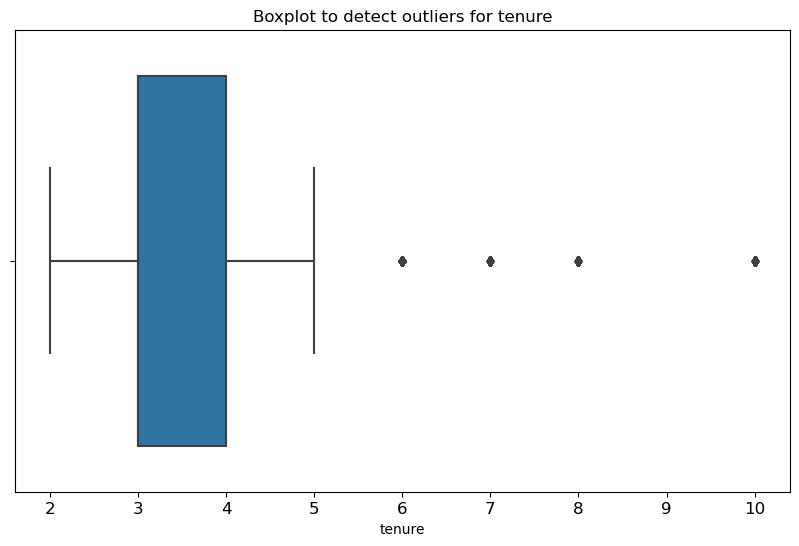

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,6))
plt.title("Boxplot to detect outliers for tenure")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

Tree-based models are robust to outliers, which means there's generally no need to specifically address them when using such models.

In [12]:
# Get numbers of people who left vs. stayed
print(df1["left"].value_counts())

# Get percentages of people who left vs. stayed
df1["left"].value_counts(normalize=True)

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

### Data visualizations

Creating a stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.


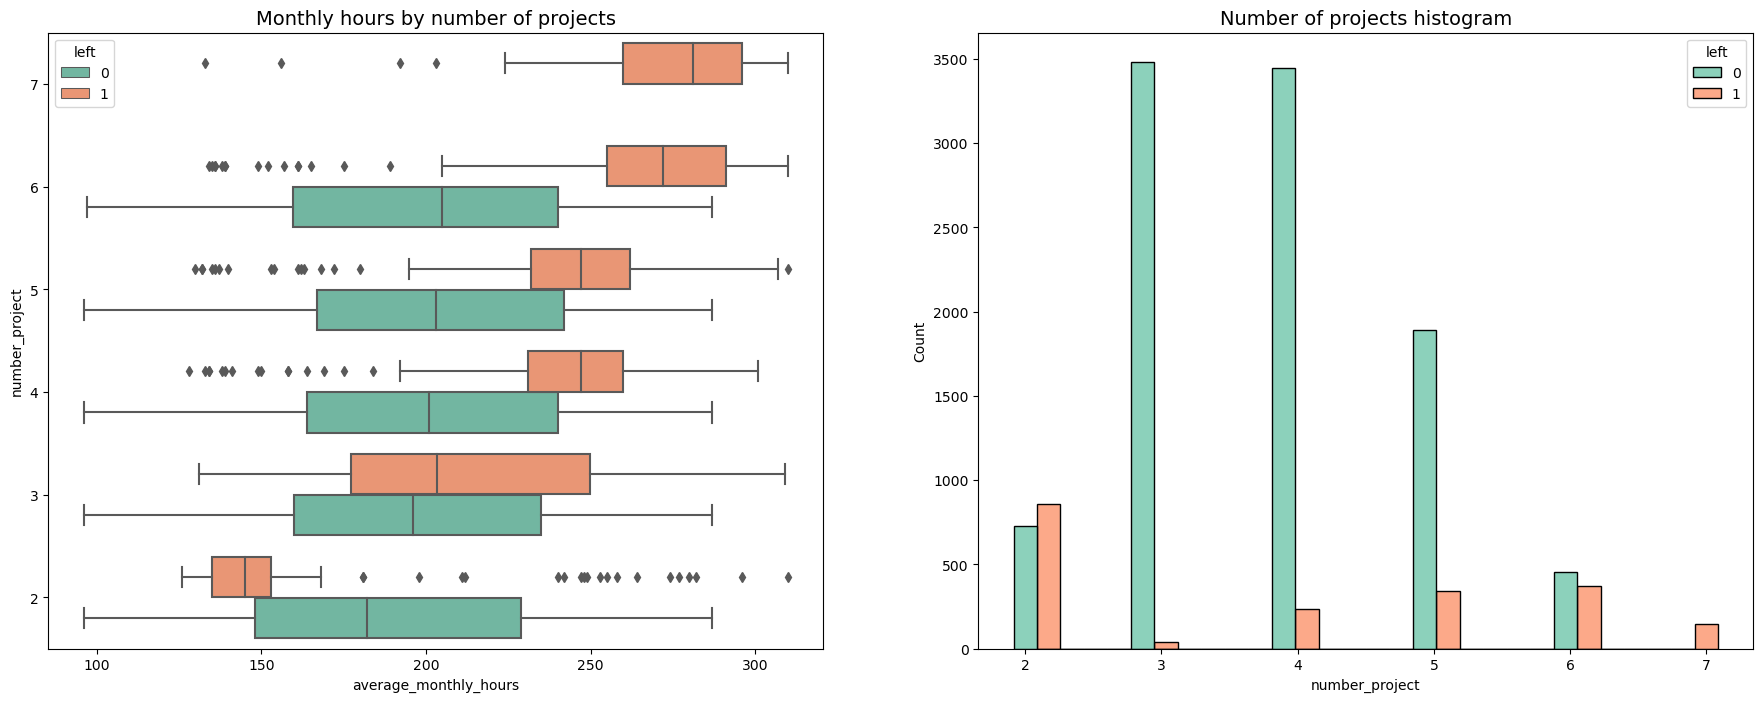

In [13]:
# Create a plot as needed
fig, ax = plt.subplots(1,2,figsize=(22,8))
palette2=sns.color_palette("Set2",n_colors=2)
sns.boxplot(data=df1,x="average_monthly_hours",y = "number_project", hue="left",orient="h",ax=ax[0],palette=palette2)
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects",fontsize="14")

sns.histplot(data=df1,x="number_project",hue = "left",multiple="dodge",shrink=2,ax=ax[1],palette=palette2)
ax[1].set_title("Number of projects histogram",fontsize=14)

plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.
1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it’s possible that they were fired. It’s also possible that this group includes employees who had already given their notice and were assigned fewer hours because
they were already on their way out the door. For those in group B, it’s reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

3.  The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn’t leave the company—worked considerably more hours than this. It seems that employees here are overworked.


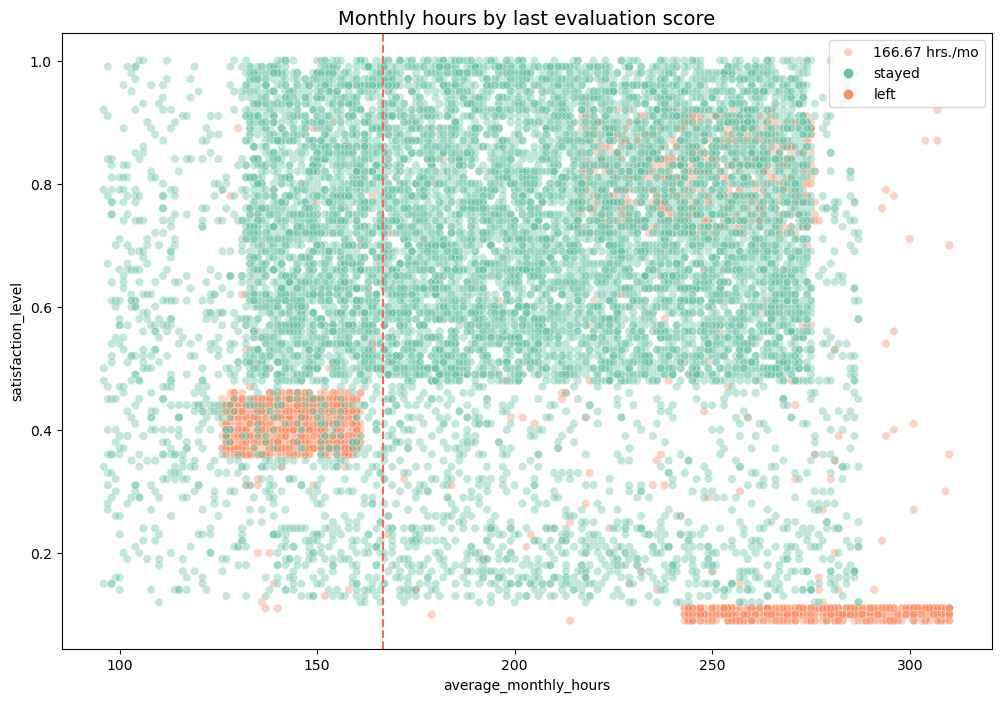

In [14]:
#  Create scatterplot of `average_monthly_hours` versus `satisfaction_level`,comparing employees who stayed versus those who left

plt.figure(figsize=(12,8))
sns.scatterplot(data=df1,x="average_monthly_hours",y="satisfaction_level",hue="left",palette=palette2,alpha=0.4)
plt.axvline(x=166.67,color="#ff6361",label="166.67 hrs./mo.",ls="--")
plt.legend(labels=["166.67 hrs./mo","stayed","left"])
plt.title("Monthly hours by last evaluation score",fontsize=14)
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It’s likely this
is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It’s difficult to speculate about why they might have left. It’s possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.


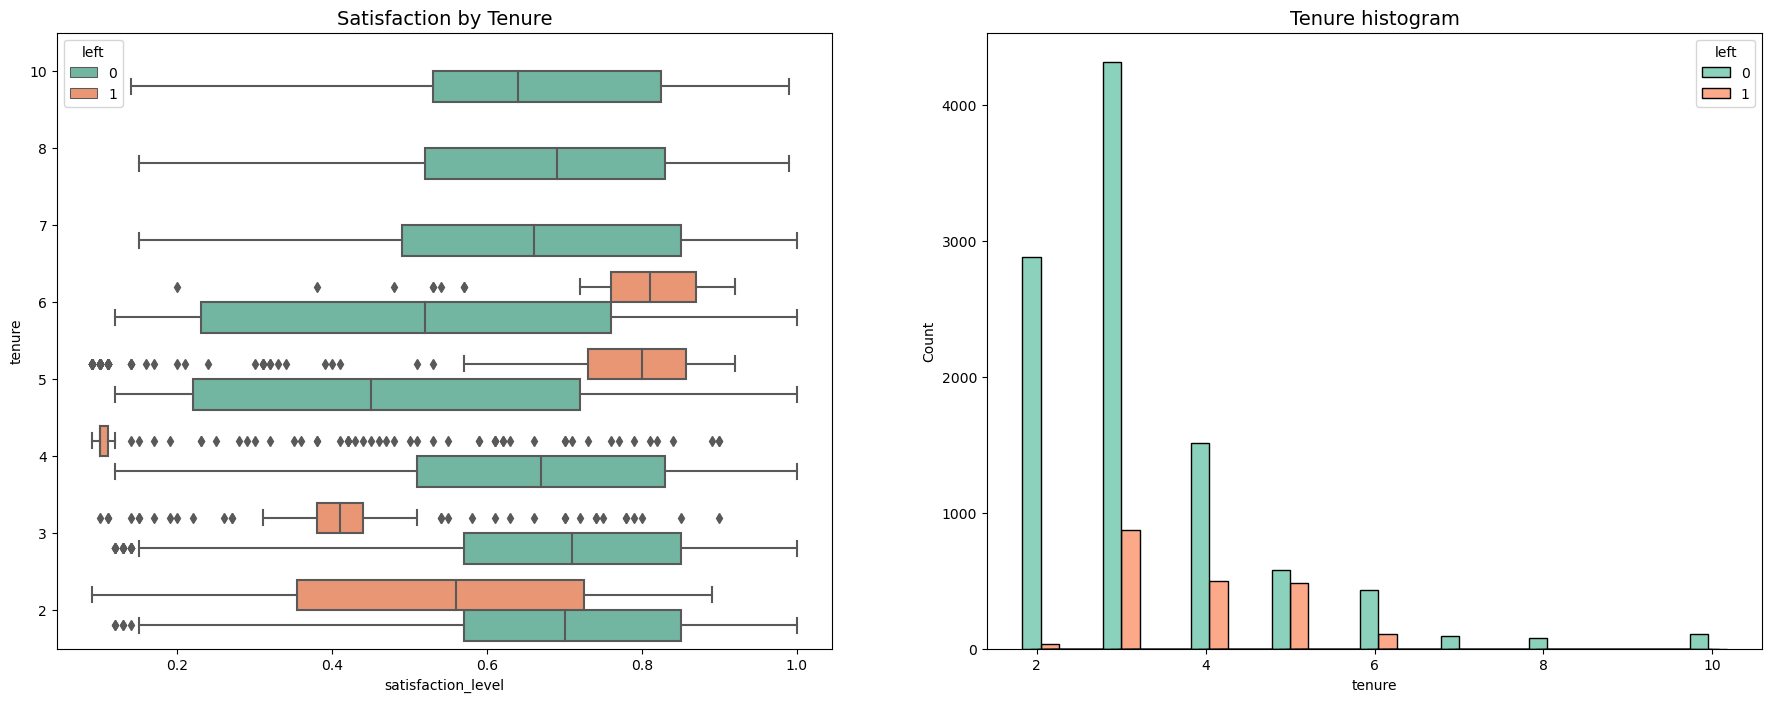

In [15]:
# Average tenure versus the satisfaction levels.
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(data=df1,x="satisfaction_level",y="tenure",hue="left",orient="h",palette=palette2,ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by Tenure",fontsize="14")

sns.histplot(data=df1,x="tenure",hue="left",multiple="dodge",shrink=5,ax=ax[1],palette=palette2)
ax[1].set_title("Tenure histogram",fontsize=14)

plt.show()


There are many observations you could make from this plot. -Employees who left fall into twogeneral categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures. - Four-year employees who left seem to have an unusually low satisfaction level. It’s worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. - The longest-tenured employees didn’t leave. Their satisfaction levels aligned with those of newer employees who stayed. - The histogram shows that there are relatively few longer-tenured employees. It’s possible that they’re the higher-ranking, higher-paid employees.

In [16]:
#  Calculate mean and median satisfaction scores of employees who left and those,who stayed
df1.groupby(["left"])["satisfaction_level"].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


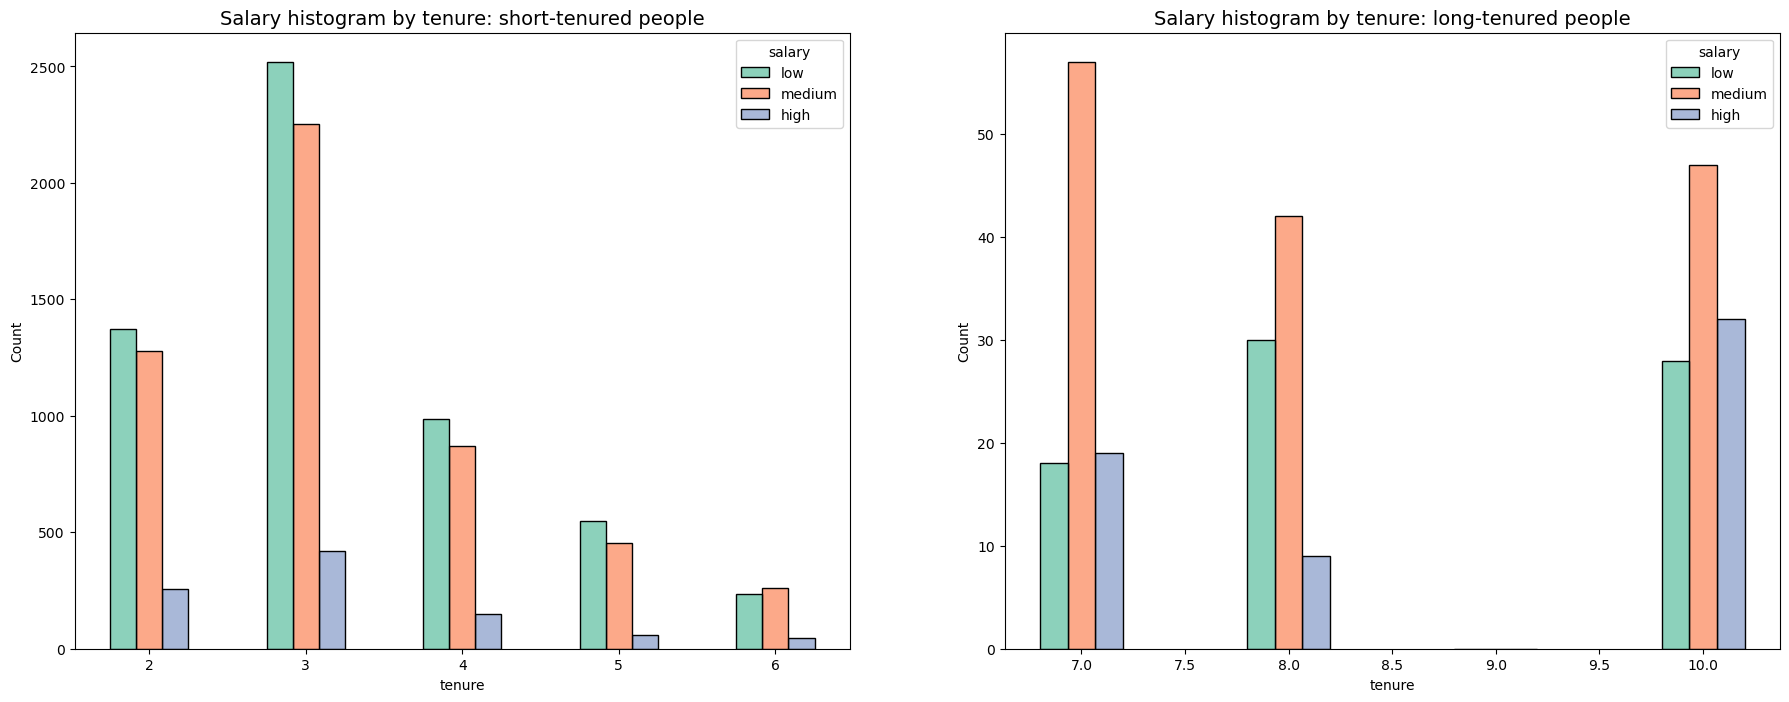

In [17]:
# Salary levels for different tenures.
fig, ax = plt.subplots(1,2,figsize=(22,8))
palette3=sns.color_palette("Set2",n_colors=3)
tenure_short = df1[df1["tenure"] < 7]
tenure_long = df1[df1["tenure"] > 6]

sns.histplot(data=tenure_short,x="tenure",hue="salary",discrete=1,hue_order=["low","medium","high"],multiple="dodge",shrink=0.5,ax=ax[0],palette=palette3)
ax[0].set_title("Salary histogram by tenure: short-tenured people", fontsize="14")

sns.histplot(data=tenure_long,x="tenure",hue="salary",discrete=1,hue_order=["low","medium","high"],multiple="dodge",shrink=0.4,ax=ax[1],palette=palette3)
ax[1].set_title("Salary histogram by tenure: long-tenured people", fontsize=14)

plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher paid employees.

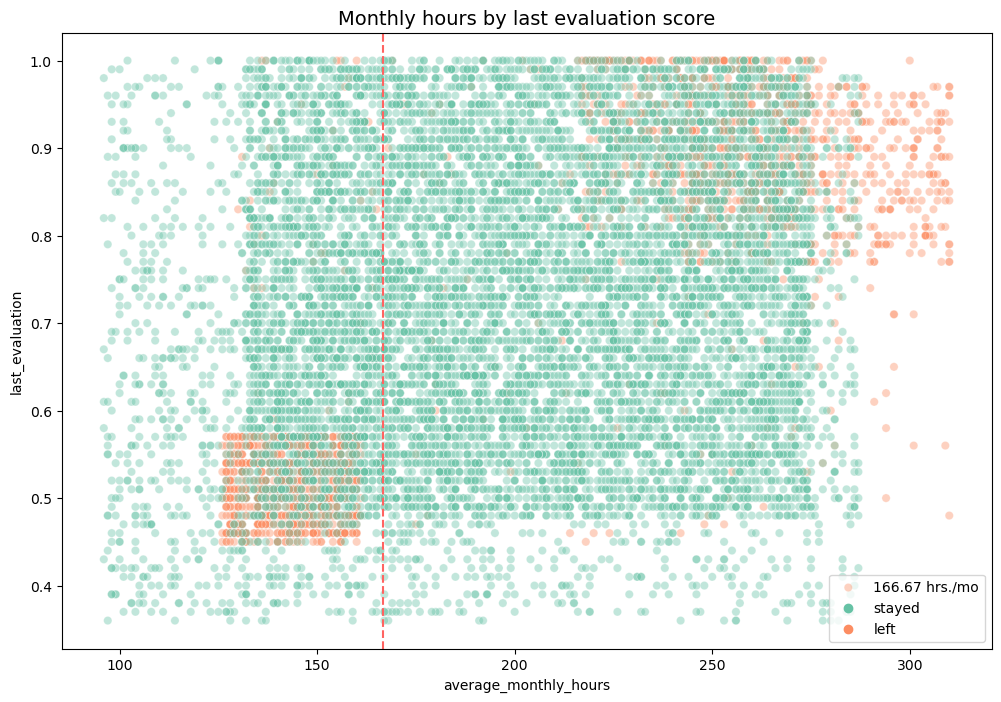

In [18]:
# average_monthly_hours versus last_evaluation
plt.figure(figsize=(12,8))

sns.scatterplot(data=df1,x="average_monthly_hours",y="last_evaluation",hue="left",alpha=0.4,palette=palette2)
plt.axvline(x=166.67,color="#ff6361",label="166.67 hrs./mo.",ls="--")
plt.legend(labels=["166.67 hrs./mo","stayed","left"])
plt.title("Monthly hours by last evaluation score",fontsize=14)
plt.show()

The following observations can be made from the scatterplot above: - The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. -There seems to be a correlation between hours worked and evaluation score. - There isn’t a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn’t guarantee a good evaluation score. -Most of the employees in this company work well over 167 hours per month.

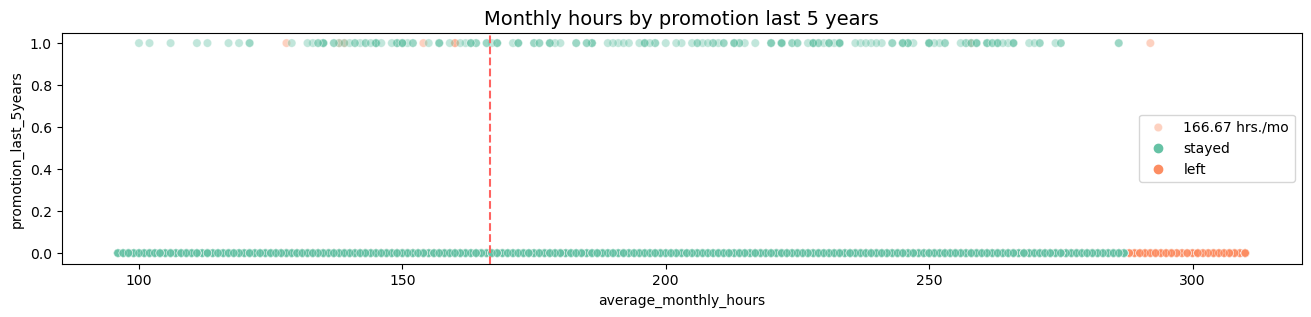

In [19]:
# Create a plot as needed
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1,x="average_monthly_hours",y="promotion_last_5years",hue="left",palette=palette2,alpha=0.4)
plt.axvline(x=166.67,color="#ff6361",label="166.67 hrs./mo.",ls="--")
plt.legend(labels=["166.67 hrs./mo","stayed","left"])
plt.title("Monthly hours by promotion last 5 years",fontsize=14)
plt.show()


The plot above shows the following: - very few employees who were promoted in the last five years left - very few employees who worked the most hours were promoted - all of the employees who left were working the longest hours

In [20]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

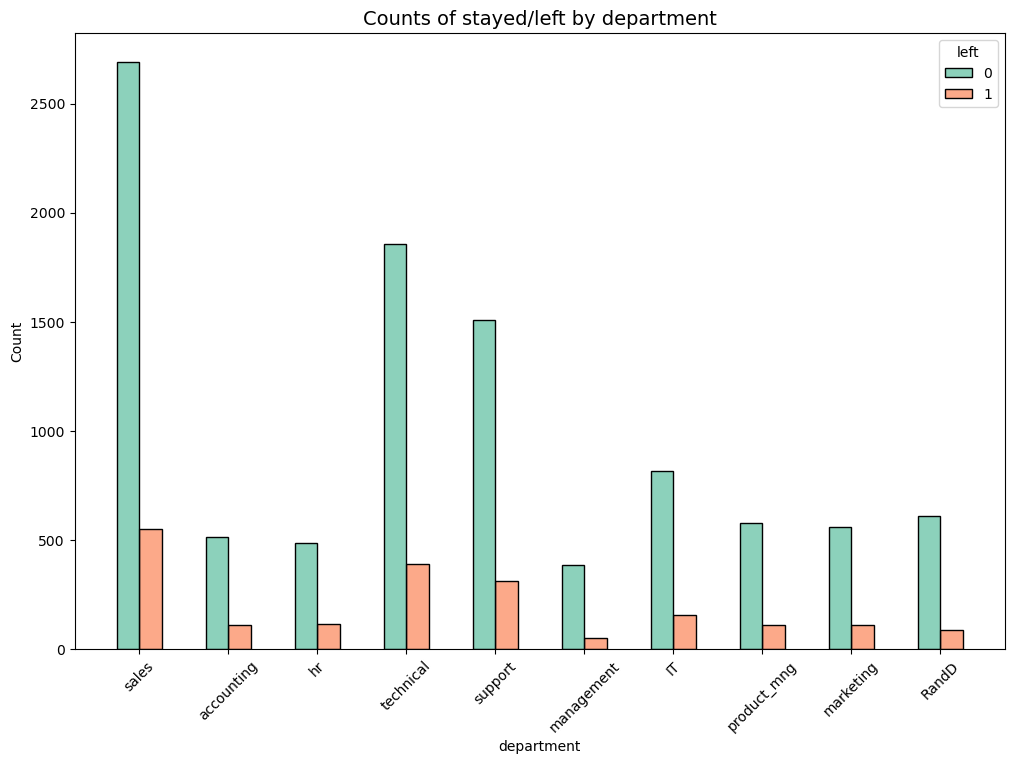

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(data=df1, x= "department",hue="left",discrete=1,hue_order=[0,1], multiple="dodge",shrink=0.5,palette=palette2)
plt.xticks(rotation=45)
plt.title("Counts of stayed/left by department",fontsize=14)

There doesn’t seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

In [22]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


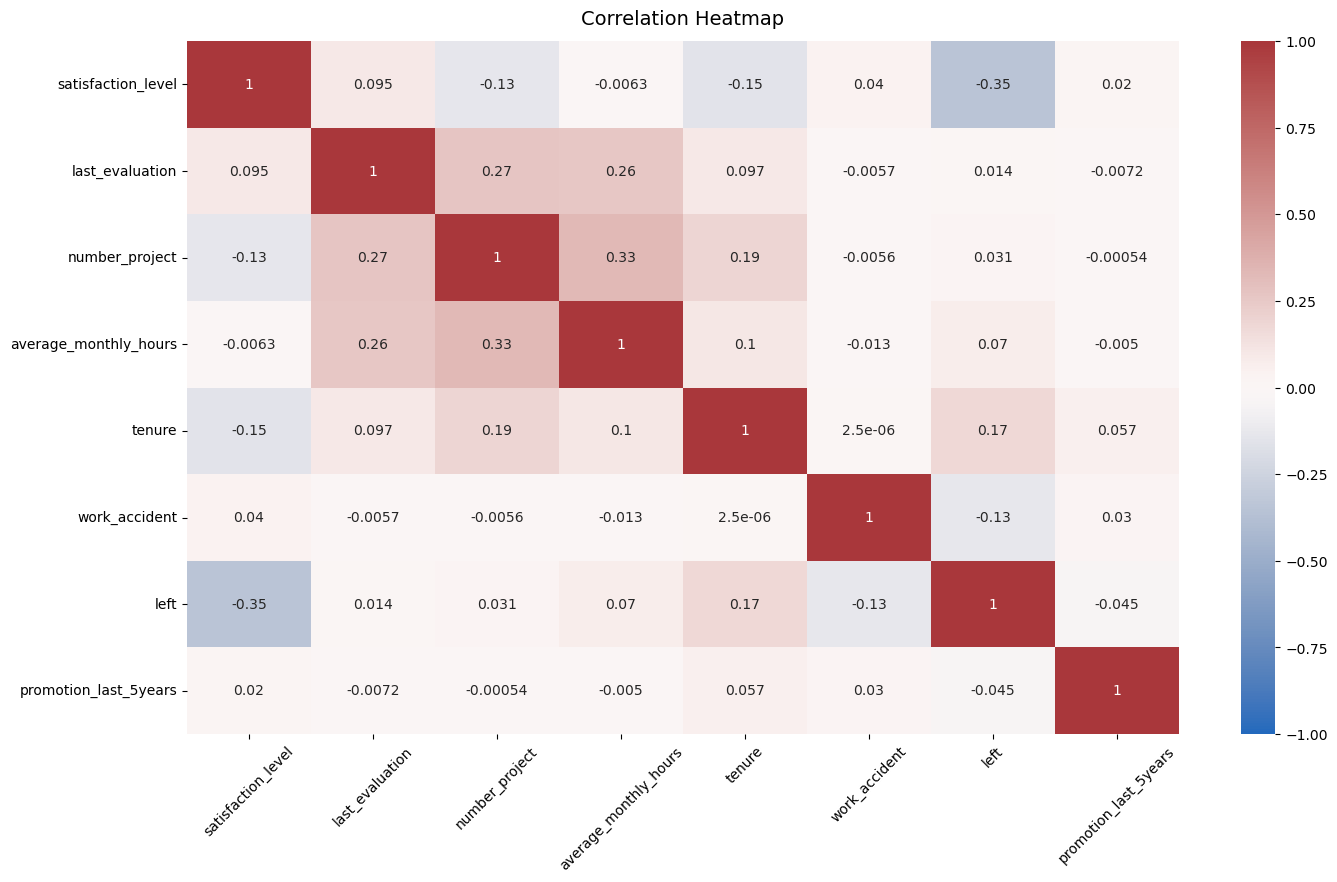

In [23]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df1.corr(numeric_only=True),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title("Correlation Heatmap",fontdict={"fontsize":14},pad =12)
plt.xticks(rotation=45)
plt.show()


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn’t leave).

### Modeling

Add as many cells as you need to conduct the modeling process.

In [24]:
df_enc = df1.copy()

df_enc["salary"] = (df_enc["salary"].astype("category")
                    .cat.set_categories(["low","medium","high"])
                    .cat.codes)

df_enc = pd.get_dummies(df_enc,drop_first=True)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [26]:
y= df_enc["left"]
X = df_enc.drop("left",axis=1)

#### Split the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.25, stratify=y, random_state=42)

In [35]:
rf = RandomForestClassifier(random_state=42)

cv_params = {"max_depth": [3,5,None],
             "max_features": [1.0,3.0],
             "max_samples": [0.7,1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [300,500],
             }

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

rf_grid = GridSearchCV(rf,cv_params,scoring=scoring,cv=4,refit="roc_auc")

In [36]:
%%time
rf_grid.fit(X_train,y_train)

c:\Users\emirh\anaconda3\envs\wazenv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\emirh\anaconda3\envs\wazenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\emirh\anaconda3\envs\wazenv\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\emirh\anaconda3\envs\wazenv\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints

CPU times: total: 49min 59s
Wall time: 58min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0, 3.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'recall', 'f1'})

In [37]:
rf_grid.best_score_

0.9820810511677253

In [38]:
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [48]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output␣
    ,→table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, accuracy, or auc
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
   
    '''
    # Create dictionary that maps input metric to actual metric name in␣

    metric_dict = {"auc": "mean_test_roc_auc",
                    "precision": "mean_test_precision",
                    "recall": "mean_test_recall",
                    "f1": "mean_test_f1",
                    "accuracy": "mean_test_accuracy"
                    }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({"model": [model_name],
    "precision": [precision],
    "recall": [recall],
    "F1": [f1],
    "accuracy": [accuracy],
    "auc": [auc]
    })
    return table


In [49]:
rf1_cv_results = make_results("rf_cv",rf_grid,"auc")

In [50]:
rf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,rf_cv,0.945928,0.912924,0.929062,0.976871,0.982081


In [51]:
def get_scores(model_name:str,model,X_test_data,y_test_data):
    '''
    Generate a table of test scores.
    In:
    model_name (string): How you want your model to be named in the output table
    model: A fit GridSearchCV object
    X_test_data: numpy array of X_test data
    y_test_data: numpy array of y_test data
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model

    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })
    return table




In [52]:
# Get predictions on test data
rf1_test_scores = get_scores("random_forest1_test", rf_grid, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random_forest1_test,0.95842,0.925703,0.941777,0.980987,0.958851


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. However, one might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring.

We could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature overworked. It will be a binary variable.

In [53]:
df2= df_enc.drop("satisfaction_level",axis=1)

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. You could define being overworked as working more than 175 hours per month on average.

In [54]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2["overworked"] = (df2["average_monthly_hours"] > 175).astype(int)
df2["overworked"].head() 

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [55]:
# Drop the `average_monthly_hours` column
df2 = df2.drop("average_monthly_hours", axis=1)

In [56]:
y = df2["left"]
X = df2.drop("left",axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

In [58]:
rf = RandomForestClassifier(random_state=42)

cv_params = {"max_depth": [3,5,None],
             "max_features": [1.0],
             "max_samples": [0.7,1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [300,500],
             }

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

rf2_grid = GridSearchCV(rf,cv_params,scoring=scoring,cv=4,refit="roc_auc")

In [59]:
%%time
rf2_grid.fit(X_train, y_train) 

CPU times: total: 34min 32s
Wall time: 36min 31s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'recall', 'f1'})

In [60]:
rf2_grid.best_score_

0.9673631646858107

In [61]:
rf2_grid.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [62]:
# Get all CV scores
rf2_cv_results = make_results("random_forest_2_cv", rf2_grid, "auc")
rf2_cv_results

,model,precision,recall,F1,accuracy,auc
0,random_forest_2_cv,0.856316,0.896177,0.875708,0.957744,0.967363


In [63]:
# Get predictions on test data
rf2_test_scores = get_scores("random_forest_2_cv", rf2_grid, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random_forest_2_cv,0.86692,0.915663,0.890625,0.962642,0.943831


This seems to be a stable, well-performing final model.

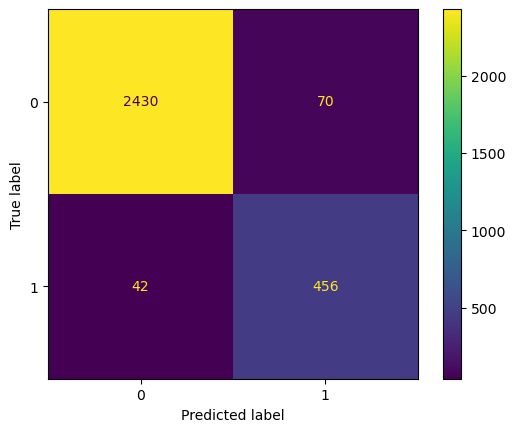

In [64]:
# Generate array of values for confusion matrix
preds = rf2_grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test,preds,labels=rf2_grid.classes_)

# Plot confusion-matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf2_grid.classes_)
disp.plot(values_format="");

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that’s actually not the case. But this is still a strong model.

#### Feature Importance

Text(0.5, 1.0, 'Random Forest: Feature Importances for Employee Leaving')

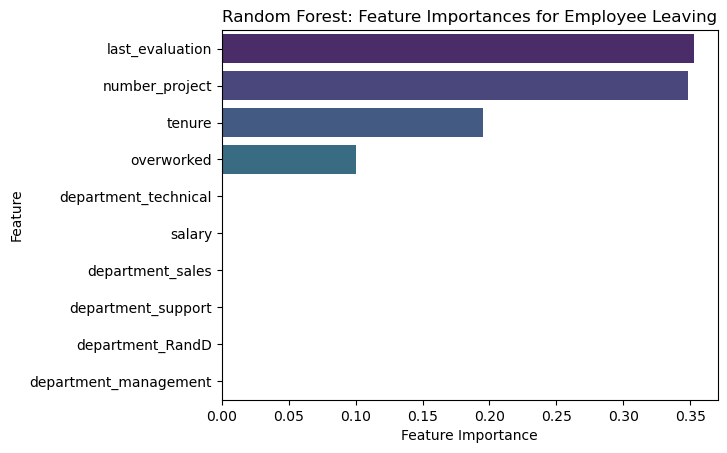

In [68]:
feat_imp = rf2_grid.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2_grid.best_estimator_.feature_importances_,-10)[-10:]

feat_cols = X.columns[ind]
feat_imp = feat_imp[ind]

y_df = pd.DataFrame({"Feature":feat_cols,"Importance":feat_imp})
y_sort_df = y_df.sort_values("Importance",ascending=False)

fig = plt.figure()

sns.barplot(x="Importance", y="Feature", data=y_sort_df, palette="viridis")

plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest: Feature Importances for Employee Leaving",fontsize=12)

The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. T

### Recommendations

To retain employees, the following recommendations could be presented to the stakeholders:

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so.
- If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
